# Selamat datang di modul Linear Regression Uni Variate
<hr></hr>


### Import library yang dibutuhkan 
* **numpy**  : numpy biasanya digunakan untuk membuat matrix, kenapa pake numpy array? numpy memungkinkan banyak operasi matrix, sperti dot product dll

* **pandas** : pandas biasanya digunakan untuk hal-hal yang berkaitan dengan dataset

* **matplotlib** : sesuai namanya (plot), library ini isinya buat plotting data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [8]:
# load data dari txt
data = pd.read_csv("dataset.txt", header=None)


In [9]:
# lihat data dari 5 teratas
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [10]:
# kita simpan semua row x dan y ke numpy array
x = np.array(data[0])
y = np.array(data[1])

# kita assign m menjadi pannjang dari data (berapa row nya)
m = len(data)

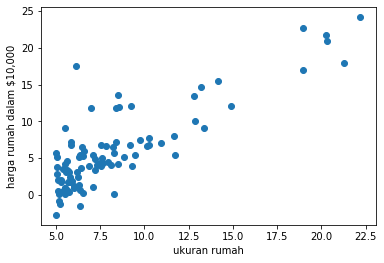

In [11]:
# plot yuk
plt.scatter(x,y)
plt.xlabel('ukuran rumah')
plt.ylabel("harga rumah dalam $10,000")
plt.show()

In [12]:
# kita buat x_0 = 1
x_0 = np.ones(m)
x = np.stack((x_0, x))

# inisialisasi theta bisa berapa aja tpi kita 0 aja
theta = np.array([0,0], dtype=float)

## Hypotesis Function and Theta Parameter
<hr></hr>

parameter theta itu menjadi penentu bentuk garis linear regresi, bisa kita lihat nih di bawah beda theta beda garis.

### Rumus 
### Hypothesis : $h_\theta(x) = \theta_0x_0 + \theta_1x_1$

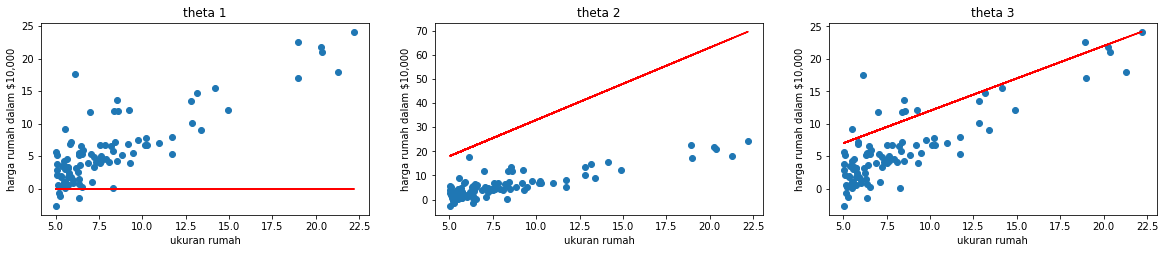

In [13]:
# bermain dengan data >:)
# btw jangan takut karena line nya banyak wkwk cuman copas kok

# y = theta_0 + theta_1 * x_1
test_theta1 = np.array([0,0], dtype=float)
test_theta2 = np.array([3,3], dtype=float)
test_theta3 = np.array([2,1], dtype=float)

fig = plt.figure(figsize=(20, 12))

# Subplot untuk test theta 1
a=fig.add_subplot(3,3,1)
plt.scatter(data[0], data[1])
plt.xlabel('ukuran rumah')
plt.ylabel("harga rumah dalam $10,000")
plt.plot(x[1], test_theta1.dot(x), color='r')
a.set_title('theta 1')

# Subplot untuk test theta 2
a=fig.add_subplot(3,3,2)
plt.scatter(data[0], data[1])
plt.xlabel('ukuran rumah')
plt.ylabel("harga rumah dalam $10,000")
plt.plot(x[1], test_theta2.dot(x), color='r')
a.set_title('theta 2')


# Subplot untuk test theta 3
a=fig.add_subplot(3,3,3)
plt.scatter(data[0], data[1])
plt.xlabel('ukuran rumah')
plt.ylabel("harga rumah dalam $10,000")
plt.plot(x[1], test_theta3.dot(x), color='r')
a.set_title('theta 3')

plt.show()


# Write the necessary methods
<hr></hr>


Nah jadi untuk membuat model linear regressi ada dua method yang harus kita implementasikan yaitu 
* **compute_cost**
* **gradient_descent**

## Compute Cost
<hr></hr>


**compute cost buat apaan si?** kalau kita mau model kita bagus apa engga, kita harus tau dong seberapa bener sih prediksi yang dilakukan model yang kita punya? caranya yaitu dengan menghitung cost function nya. 

kita dapat **menghitung akurasi dari fungsi hipotesis** kita dengan menggunakan cost function. Fungsi ini mengambil perbedaan rata-rata dari seluruh hasil fungsi hipotesis dengan hasil yang aslinya

### Rumus 
### Cost : $ J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2 $

In [14]:
def compute_cost(x, y, theta): 
    
    # kita hitung fungsi hipotesis dari data x dengan parameter theta
    h = np.matmul(theta, x)    
    
    # hitung cost function berdasarkan rumus
    cost = 1 / (2*m) * np.sum(np.square(h - y))
    
    return cost

## Gradient Descent
<hr></hr>


okay tadi kan kita udah bisa menghitung cost function kita, terus emang **cost function nya buat apaan?**

jadi kalau cost function itu adalah **perbedaan rata-rata antara hasil dari fungsi hipotesis dengan hasil yang aslinya**.. berarti semakin kecil cost function harusnya semakin bagus modelnya kan? okay **terus gimana cara nentuin cost function yang paling minimal?** 

**ide nya kita update theta nya**

### Rumus 
### Gradient Descent : 
### $\theta_j = \theta_j - \alpha\frac{d}{d\theta_j}J(\theta_0,\theta_1)$

### kalo sudah diturunin :
### $\theta_j = \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}((h_\theta(x_i) - y_i)x_i)$

In [15]:
def gradient_descent(x, y, theta, iteration, alpha):
    
    # ada berapa row dataset kita?
    m = len(y)
    
    # setiap iterasi akan ada perubahan cost, akan kita simpan ke array nilainya
    cost_history = []
    
    for _ in range(iteration): 
        
        # simultaneous update, masukin temp dulu
        temp_0 = theta[0] - alpha * 1/m * np.sum((np.matmul(theta, x) - y) * x[0])
        temp_1 = theta[1] - alpha * 1/m * np.sum((np.matmul(theta, x) - y) * x[1])
        
        # assign theta update
        theta[0] = temp_0
        theta[1] = temp_1
        
        # hitung cost theta terbaru menggunakan method compute cost
        cost_history.append(compute_cost(x, y, theta))
        
        
    
    return theta, cost_history
        

### Gradient Descent - Learning Rate

Tadi kenapa sih ada alpha di rumus gradient descent? alpha itu adalah learning rate dari gradient descent, singkatnya alpha itu menentukan seberapa cepat si gradient descent ini mengecilkan cost function 

cek ilustrasi berikut

<img src="17.png">


Hasil
Theta 0 : -3.6302914394043606
Theta 1 : 1.166362350335582
Cost    : 4.483388256587725

h(x): -3.6302914394043606 + 1.166362350335582*x


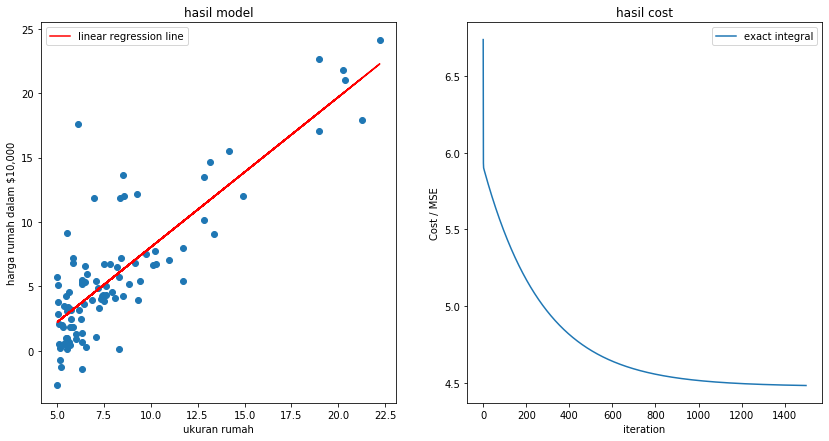

In [16]:
# akhirnya ketemu main juga :"

# btw main di python kek gini telen aja
if __name__ == "__main__": 
    
    x = np.array(data[0])
    y = np.array(data[1])
    
    # kita buat x_0 = 1
    x_0 = np.ones(m)
    x = np.stack((x_0, x))

    # inisialisasi theta, bisa berapa aja tpi kita set 0 aja yha
    theta = np.array([0,0], dtype=float)
    
    # berapa kali learning
    iteration = 1500
    
    # learning rate (hyper parameter)
    alpha = 0.01
    
    theta, cost_history = gradient_descent(x, y, theta, iteration, alpha)
 
    fig = plt.figure(figsize=(14, 7))

    # Subplot untuk test theta 1
    a=fig.add_subplot(1,2,1)
    plt.scatter(data[0], data[1])
    plt.xlabel('ukuran rumah')
    plt.ylabel("harga rumah dalam $10,000")
    plt.plot(x[1], theta.dot(x), label="linear regression line", color="r")
    a.set_title('hasil model')
    plt.legend()


    a=fig.add_subplot(1,2,2)
    plt.xlabel('iteration')
    plt.ylabel('Cost / MSE')
    plt.plot([x for x in range(iteration)], cost_history, label="exact integral")
    a.set_title('hasil cost')
    plt.legend()
    
    print("Hasil")
    print("Theta 0 : " + str(theta[0]))
    print("Theta 1 : " + str(theta[1]))
    print("Cost    : " + str(min(cost_history)))
    print("")
    print("h(x): " + str(theta[0]) +  " + " + str(theta[1]) + "*x")



# Congrats hasil cost nya nurun (klo ga nurun ada yg salah)
<hr></br>
<img src="nowwhat.jpg">

## Predict
<hr></hr>

### model yang kita dapat 
### $h(x) = -3.679 + 1.165x$
okay kita kan udah buat nih model prediksi yang "baik". Harusnya bisa dong kita coba prediksi harga rumah?

Hasil
Size Rumah     : [1, 3.5]
Prediksi Harga : 4519.767867701763


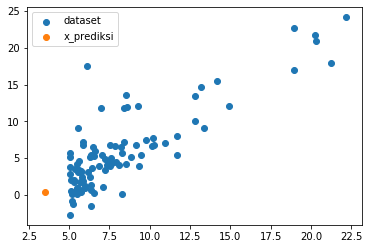

In [17]:
# misalnya gw mau prediksi rumah dengan harga 16.4 satuan (dalam 10.000$)
x_prediksi = [1, 3.5]
hasil_prediksi = np.matmul(theta, x_prediksi)

x2_prediksi = [1, 7]
hasil_prediksi = np.matmul(theta, x_prediksi)

# kita lihat dimana data baru kita berada
plt.scatter(data[0], data[1], label="dataset")
plt.scatter(x_prediksi[1], hasil_prediksi, label="x_prediksi")
plt.legend()

# plt.plot(x[1], theta.dot(x), label="linear regression line", color="r")
print("Hasil")
print("Size Rumah     : " + str(x_prediksi))
print("Prediksi Harga : " + str(hasil_prediksi * 10000))

# Congrats

wow selamat kalian udah ngerti linear regresi untuk satu variable, linear regresi menjadi dasar yang sangat dibutuhkan apalagi buat kalian anak AI, jgn dilupain yaa!

### whats next ? 

sebenernya ini baru satu variable, ada juga yang multi variable. Di modul ini juga gw ga ngajarin caranya feature scaling, polynomial equation, normal equation, dll karena waktu yang terbatas

gw rekomen banget nonton Course nya Andrew Ng Machine Learning kalau emang mau dalemin AI

Thanks!

### Surface Plot & Contour Plot

In [18]:
theta0_vals=np.linspace(-10, 10, 100)
theta1_vals=np.linspace(-1, 4, 100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)): 
        t = np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i, j] = compute_cost(x, y, t)
        
J_vals = np.transpose(J_vals)

Text(0.5, 1.0, 'Cost')

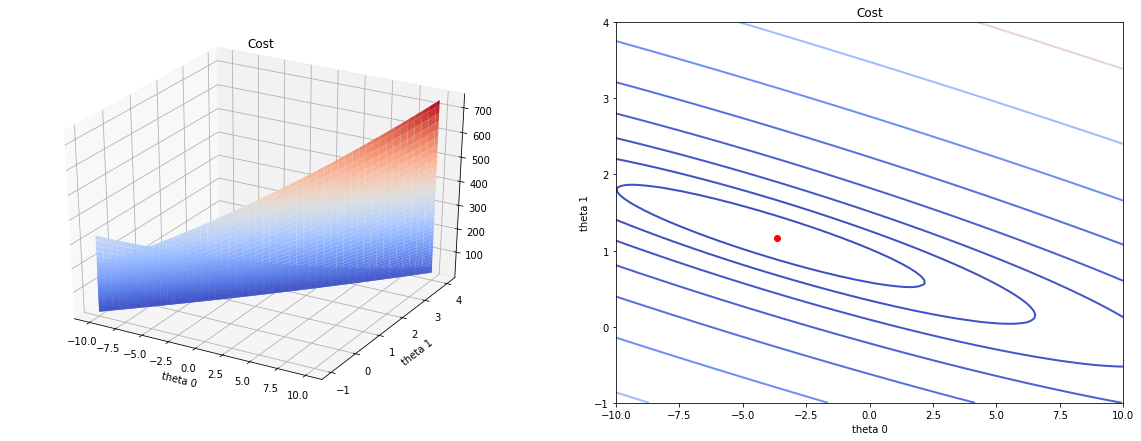

In [19]:
#Generating the surface plot
fig = plt.figure(figsize=(20, 7))
a=fig.add_subplot(1,2,1, projection='3d')
a.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='coolwarm')
plt.xlabel('theta 0')
plt.ylabel("theta 1")
a.set_title('Cost')

a=fig.add_subplot(1,2,2)
a.contour(theta0_vals, theta1_vals, J_vals,linewidths=2, levels=np.logspace(-2, 3, 20), cmap='coolwarm')
plt.scatter(theta[0], theta[1], color='r')
plt.xlabel('theta 0')
plt.ylabel("theta 1")
a.set_title('Cost')